**Practical Lab 1- Univariate Linear Regression on the California Housing Prices Dataset**

**CSCN8010,Sec2 –Foundations of Machine Learning Frameworks**

**Name : Pradeepti Kasam**

**Student ID : 8965985**

**Step 1:**

**Framing the Problem - Describe the goal of this report.**

1. The goal of this report is to analyze the California housing market using the dataset provided on Kaggle. 
2. Its specific goal is to identify the main factors that influence the housing costs in California, including location, room count, and ease of access to facilities. 
3. The research aims to provide insights into these aspects so that stakeholders can make informed decisions on policy-making, urban planning, and real estate investments. 
4. In addition, this research will draw attention to market trends and patterns, providing a thorough picture of California's housing situation as it stands right now.

**Step 2:**

**Getting the Data - hyperlink to the source and load into Pandas.**

Source : [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [159]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [160]:
# Load the dataset
housing_dataset = pd.read_csv('../Assignment1/housing.csv')
# Displaying the first 5 rows of the dataset
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Step 3:**

**Exploratory Data Analysis (EDA):**

1.Explore statistics (e.g. using Pandas `describe` function) 

In [161]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


2.Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next.

[Text(0.5, 1.0, 'Median House Value vs Median Income')]

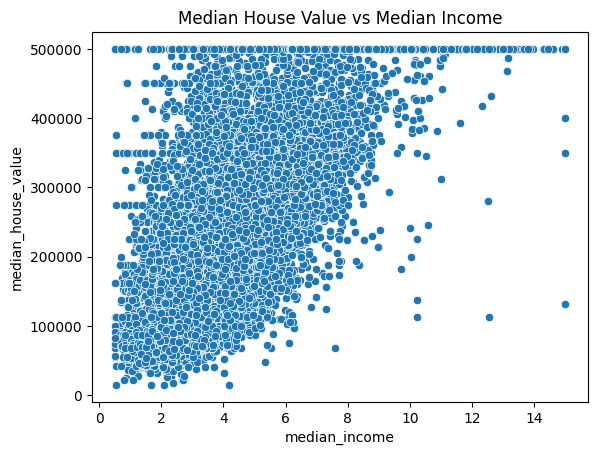

In [162]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_dataset).set(title='Median House Value vs Median Income')

Textual Interpretation & Insights :

1.There is a positive correlation between median income and median house value. As median income increases, the median house value tends to increase as well.

2.Values of houses appear to level off at $500,000. This suggests that there may have been a cap on home values in the dataset at $500,000.

3.The data is densely concentrated for median incomes between 2 and 10.

[Text(0.5, 1.0, 'Median House Value vs population')]

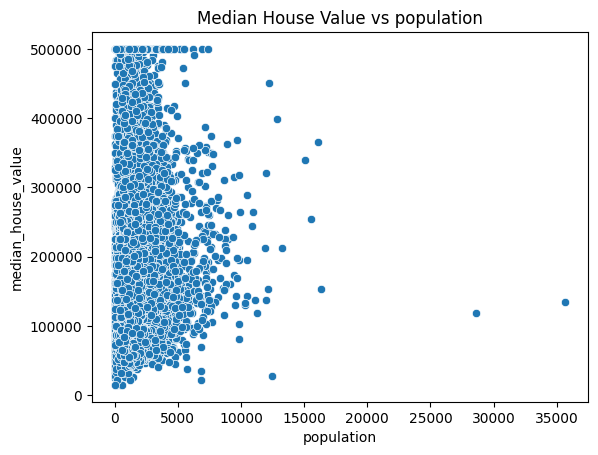

In [163]:
sns.scatterplot(x='population', y='median_house_value', data=housing_dataset).set(title='Median House Value vs population')

Textual Interpretation & Insights :

1.Most of the data points are clustered for populations below 10,000, indicating that a majority of the observations come from smaller population areas.

2.The house values appear to be capped at $500,000, which implies that the data has been artificially limited at the upper end.

3.This scatterplot shows no obvious linear relationship between population size and median house value, leading to lack of clear correlation.


[Text(0.5, 1.0, 'Median House Value vs number of households')]

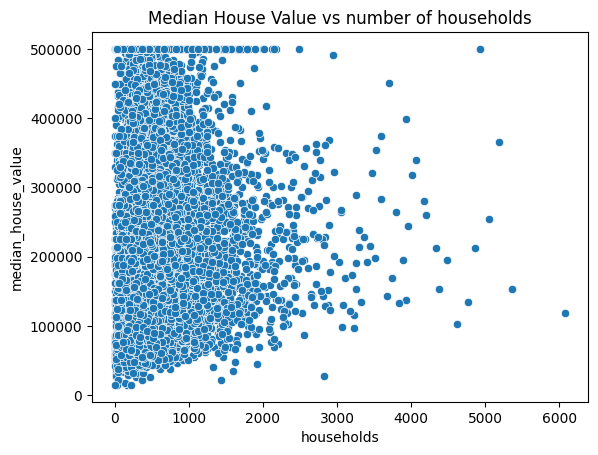

In [164]:
sns.scatterplot(x='households', y='median_house_value', data=housing_dataset).set(title='Median House Value vs number of households')

Textual Interpretation & Insights :

1.The house values appear to be capped at $500,000, which implies that the data has been artificially limited at the upper end.

2.The distribution of points indicates that many households (less than 1000) are connected to a broad range of property values. However, the disparity in home values seems to decrease when the number of households rises above 3000.

3.While there seems to be a vertical concentration of data points for households between 0 and 3000, there's no obvious linear relationship between the number of households and the median house value.


3.Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant.

Population: Represents the number of people residing in the block group or area. Typically ranges from a few hundred to several thousand.

Households: Indicates the number of households in the block group. Households consist of individuals living together under one roof, often varying in size.

Median Income: This is the median income of households in the block group, measured in tens of thousands of dollars. It reflects the economic standing of the population in that region, typically ranging from 0 to 15 (which translates to $0 to $150,000).

Median House Value: Represents the median housing price in the area. Measured in dollars, this reflects the cost of housing and typically ranges from around $14,999 to $500,001 and above.

**Step 4:**

**Run three linear regressions (fitting) between:**

**1. median house value vs. median income**

**2. median house value vs. population**

**3. median house value vs. number of households.**

In [165]:
#median house value vs. median income
model_income = linear_model.LinearRegression()
modelWithmedianIncome = model_income.fit(X=housing_dataset[["median_income"]], y=housing_dataset[["median_house_value"]])


In [166]:
#median house value vs. population
model_population = linear_model.LinearRegression()
modelWithPopulation = model_population.fit(X=housing_dataset[["population"]], y=housing_dataset[["median_house_value"]])

In [167]:
#median house value vs. number of households
model_households = linear_model.LinearRegression()
modelWithHouseholds = model_households.fit(X=housing_dataset[["households"]], y=housing_dataset[["median_house_value"]])

**Step 5:**

**In a single table for all three linear regressions, provide per regression model:**

**1. intercept and slope**

**2. Mean Squared Error**

**3. Mean Absolute Error**


In [168]:
intercept_income = modelWithmedianIncome.intercept_
slope_income = modelWithmedianIncome.coef_[0]
mse_income = mean_squared_error(housing_dataset[["median_house_value"]], model_income.predict(housing_dataset[["median_income"]]))
mae_income = mean_absolute_error(housing_dataset[["median_house_value"]], model_income.predict(housing_dataset[["median_income"]]))

In [169]:
intercept_population = modelWithPopulation.intercept_
slope_population = modelWithPopulation.coef_[0]
mse_population = mean_squared_error(housing_dataset[["median_house_value"]], model_population.predict(housing_dataset[["population"]]))
mae_population = mean_absolute_error(housing_dataset[["median_house_value"]], model_population.predict(housing_dataset[["population"]]))

In [170]:
intercept_households = modelWithHouseholds.intercept_
slope_households = modelWithHouseholds.coef_[0]
mse_households = mean_squared_error(housing_dataset[["median_house_value"]], model_households.predict(housing_dataset[["households"]]))
mae_households = mean_absolute_error(housing_dataset[["median_house_value"]], model_households.predict(housing_dataset[["households"]]))

In [171]:
#organizing the results in a dataframe
results = pd.DataFrame({
    'Model': ['Median House Value vs. Median Income', 'Median House Value vs. Population', 'Median House Value vs. Households'],
    'Intercept': [intercept_income, intercept_population, intercept_households],
    'Slope': [slope_income, slope_population, slope_households],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
})
# Displaying the Intercept, Slope, MSE and MAE for each model
results

,Model,Intercept,Slope,MSE,MAE
0,Median House Value vs. Median Income,[45085.5767032679],[41793.849201896286],7.011312e+09,62625.933791
1,Median House Value vs. Population,[210436.26207627333],[-2.511752774615085],1.330741e+10,91153.820095
2,Median House Value vs. Households,[196928.57716233088],[19.872775155643875],1.325778e+10,90802.743243


**Optional step to Filter out records with median_house_value = 500001 since there seems to be a cap for the median_house_value.**

In [172]:
housing_dataset_withoutcap = housing_dataset[housing_dataset.median_house_value != 500001]

**Step 6:**

**Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)**

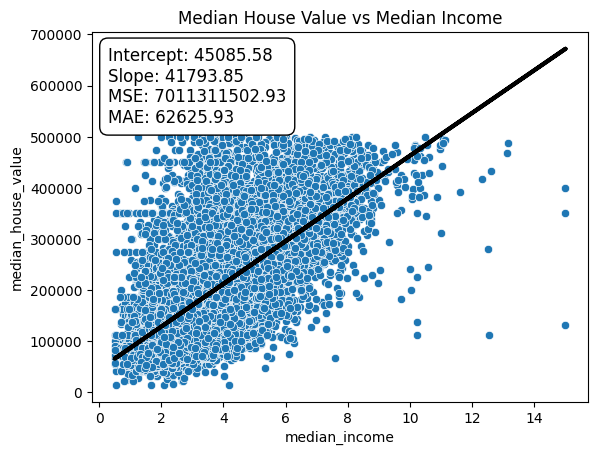

In [191]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_dataset_withoutcap).set(title='Median House Value vs Median Income')
plt.plot(housing_dataset_withoutcap[["median_income"]], model_income.predict(housing_dataset_withoutcap[["median_income"]]), color="black", linewidth=3)
textstr = '\n'.join((
    f'Intercept: {intercept_income.item():.2f}',
    f'Slope: {slope_income.item():.2f}',
    f'MSE: {mse_income:.2f}',
    f'MAE: {mae_income:.2f}',
))

# Place the text box in the graph
plt.gcf().text(0.15, 0.85, textstr, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.show()

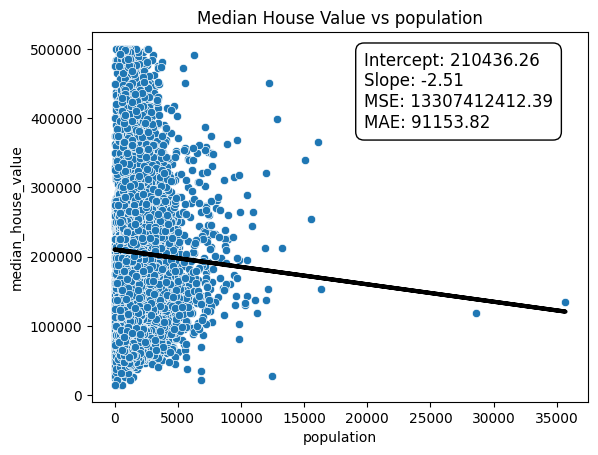

In [174]:
sns.scatterplot(x='population', y='median_house_value', data=housing_dataset_withoutcap).set(title='Median House Value vs population')
plt.plot(housing_dataset_withoutcap[["population"]], model_population.predict(housing_dataset_withoutcap[["population"]]), color="black", linewidth=3)
textstr = '\n'.join((
    f'Intercept: {intercept_population.item():.2f}',
    f'Slope: {slope_population.item():.2f}',
    f'MSE: {mse_population:.2f}',
    f'MAE: {mae_population:.2f}',
))

# Place the text box in the graph
plt.gcf().text(0.55, 0.84, textstr, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.show()

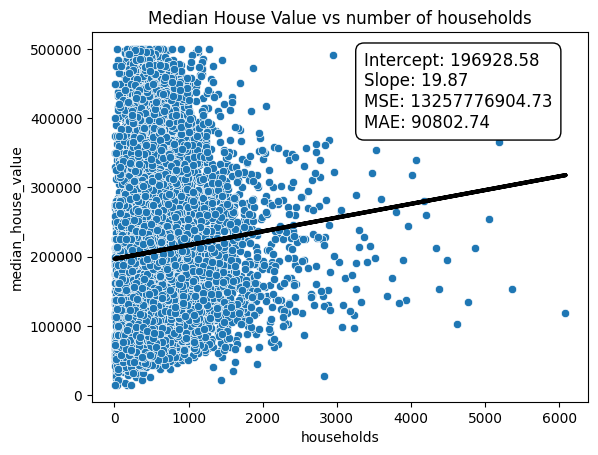

In [181]:
sns.scatterplot(x='households', y='median_house_value', data=housing_dataset_withoutcap).set(title='Median House Value vs number of households')
plt.plot(housing_dataset_withoutcap[["households"]], model_households.predict(housing_dataset_withoutcap[["households"]]), color="black", linewidth=3)
textstr = '\n'.join((
    f'Intercept: {intercept_households.item():.2f}',
    f'Slope: {slope_households.item():.2f}',
    f'MSE: {mse_households:.2f}',
    f'MAE: {mae_households:.2f}',
))

# Place the text box in the graph
plt.gcf().text(0.55, 0.84, textstr, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.show()

**Step 7:**

**Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed**

Best -Fit model can be determined based on certain paramaters like R-squared value, MSE, MAE etc.


In [176]:
# To calculate R-squared Values
predicted_income = modelWithmedianIncome.predict(housing_dataset[["median_income"]])
r2_income = r2_score(housing_dataset[["median_house_value"]], predicted_income)
predicted_population = modelWithPopulation.predict(housing_dataset[["population"]])
r2_population = r2_score(housing_dataset[["median_house_value"]], predicted_population)
predicted_households = modelWithHouseholds.predict(housing_dataset[["households"]])
r2_households = r2_score(housing_dataset[["median_house_value"]], predicted_households)

In [177]:
#Printing the R-squared values
print(f"R-squared for model based on median income: {r2_income}")
print(f"R-squared for model based on population: {r2_population}")
print(f"R-squared for model based on households: {r2_households}")

print("\n")
#Printing the MSE values
print(f"MSE based on median income: {mse_income}")
print(f"MSE based on population: {mse_population}")
print(f"MSE based on households: {mse_households}")

print("\n")
#Printing the slope values
print(f"Slope based on median income: {slope_income}")
print(f"Slope based on population: {slope_population}")
print(f"Slope based on households: {slope_households}")


R-squared for model based on median income: 0.47344749180719903
R-squared for model based on population: 0.0006076066693256887
R-squared for model based on households: 0.0043352546340906795


MSE based on median income: 7011311502.929527
MSE based on population: 13307412412.389355
MSE based on households: 13257776904.728533


Slope based on median income: [41793.8492019]
Slope based on population: [-2.51175277]
Slope based on households: [19.87277516]


Observations :

1. A higher R² value (closer to 1) indicates a better fit, and from the above values model with median_income has higher R-squared value comparing it to be a better fit.

2. Model with lower Mean Square Error(MSE) indicates a better fit , and from the above values model with median_income has lowest MSE comparing it to be a better fit and and with lowest prediction error.

3. The slope suggests that for every unit increase , the median house value increases by a particular amount.
   Amongst the three variables slope of median_income(41,793.85) is highest showing a strong positive relationship between income and house prices.


Conclusion : 

This indicates that income is the most significant predictor of housing prices among the three variables tested.



